## Loading In Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
data = pd.read_csv('working_data.csv', parse_dates=[0], infer_datetime_format= True)
#data['date'] = pd.to_datetime(data['date'])

In [3]:
len(data)

5000000

In [4]:
data['month'].unique()

array([ 3,  4,  1,  7,  2,  5, 10,  6,  9,  8, 11])

In [5]:
data['date'].max()

Timestamp('2021-12-31 00:00:00')

In [6]:
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

data['day_name'] = pd.Categorical(data['day_name'], categories=cats, ordered=True)

In [7]:
cats = ['January', 'February', 'March', 'April', 'May', 'June', 
       'July', 'August', 'September', 'October', 'November', 'December']

data['month_name'] = pd.Categorical(data['month_name'], categories=cats, ordered=True)

In [8]:
data.head()

,date,device_id,sessions,tts,tps,app_name,android,month,month_name,day,...,tts_boxcox,tps_boxcox,sessions_scaled,tts_scaled,tps_scaled,sessions_stand,tts_stand,tps_stand,app_number,android_num
0,2021-05-21,yb0YMYO4QAyxb9cSsO4iGBpV9VSbXa,1,392,392.00,instagram,unknown,3,May,4,...,7.720724,6.415609,0.000000,0.352369,0.462865,-0.570834,-0.284362,0.740284,1,1
1,2021-09-26,JzG2JaSOoO7wvPmfmnocXKQdoI9r24,1,6,6.00,instagram,unknown,4,September,6,...,1.931261,1.830445,0.000000,0.061241,0.091619,-0.570834,-1.872475,-1.909764,1,1
2,2021-11-23,baPdvtjbrRxztRCNnuaQodr6ZvwwFn,2,266,133.00,whatsapp,android,3,November,1,...,7.095537,5.185791,0.001451,0.320931,0.363291,-0.510790,-0.455858,0.029497,6,0
3,2021-07-01,8zfpLx8jdEwirtXKTPlrGQUB0y58Rb,22,1987,90.32,pinterest,android,1,July,3,...,10.566469,4.753111,0.030479,0.495469,0.328258,0.690078,0.496257,-0.220575,2,0
4,2021-03-31,PRJOvGZtFVtGlS4qcgXZaqKicB8g7Q,88,2561,29.10,facebook,unknown,7,March,2,...,11.046936,3.509391,0.126270,0.519630,0.227558,4.652944,0.628054,-0.939398,0,1


## Investigating Histograms

<AxesSubplot:xlabel='sessions', ylabel='Density'>

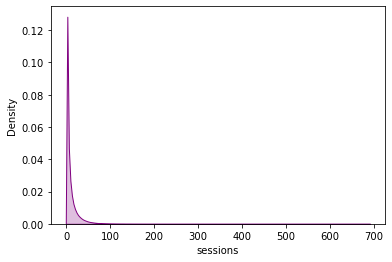

In [9]:
sns.kdeplot(data['sessions'], fill=True, color='purple')

<AxesSubplot:xlabel='tts', ylabel='Density'>

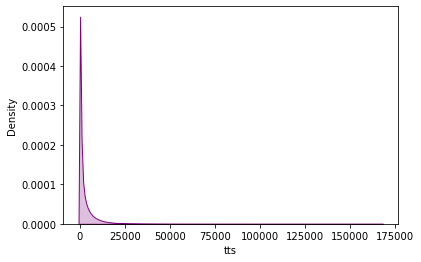

In [10]:
sns.kdeplot(data['tts'], fill=True, color='purple')

<AxesSubplot:xlabel='tps', ylabel='Density'>

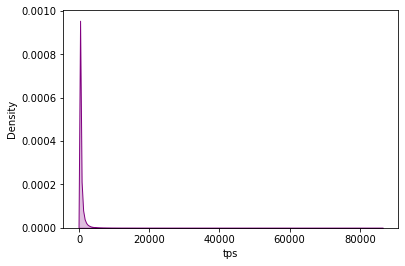

In [11]:
sns.kdeplot(data['tps'], fill=True, color='purple')

## Per Month Metrics

In [12]:
def metric_agg(data, column):
    agg_metrics = data.groupby(['month', 'month_name'])[f'{column}'].describe().reset_index()

    temp = data.groupby(['month', 'month_name'])[f'{column}'].sum().reset_index()

    agg_metrics = pd.merge(agg_metrics, temp, 
                           how='left', left_on=['month', 'month_name'], 
                           right_on=['month', 'month_name'], copy=False)

    return agg_metrics

In [13]:
month_data = metric_agg(data, 'sessions')
month_data

,month,month_name,count,mean,std,min,25%,50%,75%,max,sessions
0,1,January,38355.0,10.473472,16.428871,1.0,2.0,4.0,12.0,390.0,401710
1,1,February,34910.0,10.343598,16.414555,1.0,2.0,4.0,12.0,302.0,361095
2,1,March,38712.0,10.530817,16.471028,1.0,2.0,4.0,12.0,360.0,407669
3,1,April,37439.0,10.430540,16.296451,1.0,2.0,4.0,12.0,309.0,390509
4,1,May,38457.0,10.552331,16.342489,1.0,2.0,4.0,12.0,336.0,405811
...,...,...,...,...,...,...,...,...,...,...,...
127,11,August,38731.0,10.578296,16.881487,1.0,2.0,4.0,12.0,408.0,409708
128,11,September,37765.0,10.546352,16.936372,1.0,2.0,4.0,12.0,303.0,398283
129,11,October,38475.0,10.430461,16.314614,1.0,2.0,4.0,12.0,408.0,401312
130,11,November,37298.0,10.591962,16.908949,1.0,2.0,4.0,12.0,334.0,395059


<AxesSubplot:xlabel='month_name', ylabel='mean'>

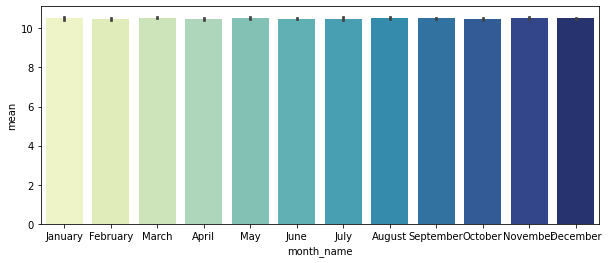

In [14]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.barplot(data=month_data, x='month_name', y='mean', palette='YlGnBu', ax=ax)

<AxesSubplot:xlabel='month_name', ylabel='sessions'>

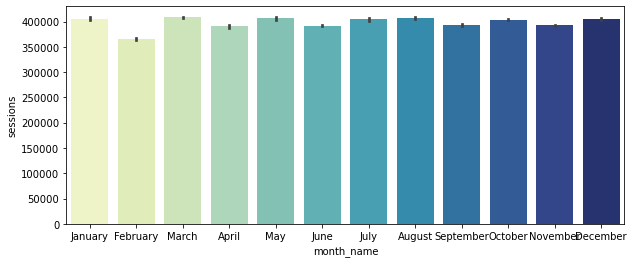

In [15]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.barplot(data=month_data, x='month_name', y='sessions', palette='YlGnBu', ax=ax)

In [16]:
month_data = metric_agg(data, 'tts')
month_data

,month,month_name,count,mean,std,min,25%,50%,75%,max,tts
0,1,January,38355.0,3112.010038,6204.867404,2.0,126.0,781.0,3288.50,112625.0,119361145
1,1,February,34910.0,3050.450816,6002.230406,2.0,128.0,768.0,3286.75,87325.0,106491238
2,1,March,38712.0,3113.350356,6066.487264,2.0,124.0,776.0,3318.00,90441.0,120524019
3,1,April,37439.0,3129.529768,6190.170969,2.0,127.0,782.0,3330.00,121375.0,117166465
4,1,May,38457.0,3093.310763,6041.709579,2.0,128.0,793.0,3385.00,137752.0,118959452
...,...,...,...,...,...,...,...,...,...,...,...
127,11,August,38731.0,3114.784126,6180.341494,2.0,127.0,782.0,3303.00,86122.0,120638704
128,11,September,37765.0,3146.109572,6211.933582,2.0,126.0,779.0,3370.00,123829.0,118812828
129,11,October,38475.0,3103.528291,6071.918165,2.0,126.0,789.0,3300.50,90567.0,119408251
130,11,November,37298.0,3087.492681,6055.762683,2.0,128.0,792.0,3343.75,115012.0,115157302


<AxesSubplot:xlabel='month_name', ylabel='mean'>

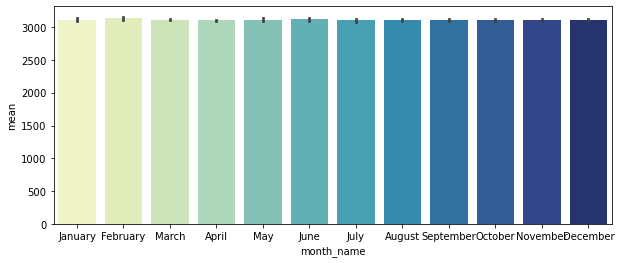

In [17]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.barplot(data=month_data, x='month_name', y='mean', palette='YlGnBu', ax=ax)

<AxesSubplot:xlabel='month_name', ylabel='tts'>

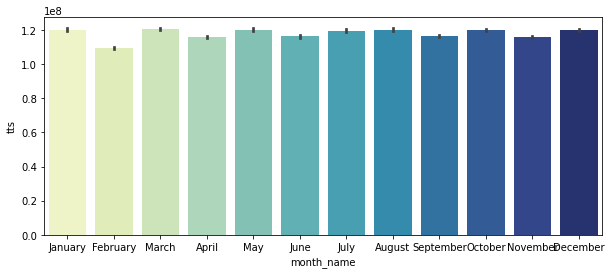

In [18]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.barplot(data=month_data, x='month_name', y='tts', palette='YlGnBu', ax=ax)

In [19]:
month_data = metric_agg(data, 'tps')
month_data

,month,month_name,count,mean,std,min,25%,50%,75%,max,tps
0,1,January,38355.0,385.460340,1191.896283,2.0,44.075,130.670,358.9200,83666.0,14784331.33
1,1,February,34910.0,387.753921,1330.069688,2.0,43.500,132.035,358.6700,86318.0,13536489.37
2,1,March,38712.0,392.039721,1200.513092,2.0,43.330,130.500,359.5000,54898.0,15176641.68
3,1,April,37439.0,401.894051,1333.727477,2.0,44.000,132.400,362.7850,77284.0,15046511.36
4,1,May,38457.0,389.736613,1198.068610,2.0,44.000,132.170,360.6700,64393.0,14988100.94
...,...,...,...,...,...,...,...,...,...,...,...
127,11,August,38731.0,391.441882,1250.051050,2.0,43.695,132.000,357.1350,84899.0,15160935.53
128,11,September,37765.0,392.769377,1255.734123,2.0,43.500,132.000,363.9100,77322.0,14832935.52
129,11,October,38475.0,378.599019,1060.063774,2.0,43.920,131.250,359.0000,54229.0,14566597.25
130,11,November,37298.0,390.321034,1164.684740,2.0,44.000,132.070,359.0000,60138.0,14558193.93


<AxesSubplot:xlabel='month_name', ylabel='mean'>

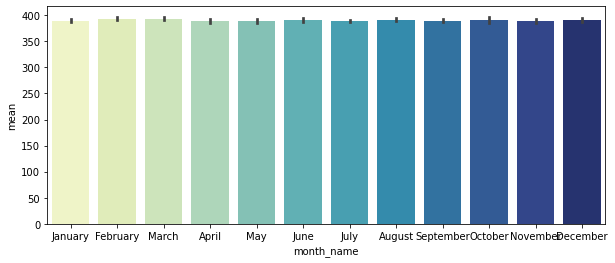

In [20]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.barplot(data=month_data, x='month_name', y='mean', palette='YlGnBu', ax=ax)

<AxesSubplot:xlabel='month_name', ylabel='tps'>

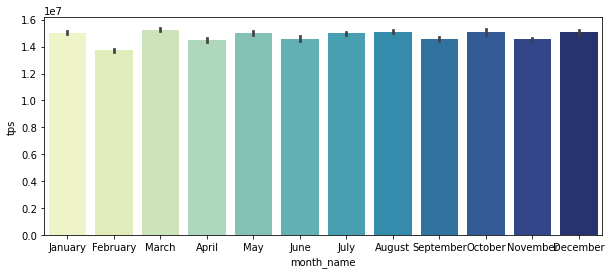

In [21]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.barplot(data=month_data, x='month_name', y='tps', palette='YlGnBu', ax=ax)

## Per Date Metrics

In [22]:
def metric_date_agg(data, column):
    agg_metrics = data.groupby(['date'])[f'{column}'].describe().reset_index()

    temp = data.groupby(['date'])[f'{column}'].sum().reset_index()

    agg_metrics = pd.merge(agg_metrics, temp, 
                           how='left', left_on=['date'], 
                           right_on=['date'], copy=False)

    return agg_metrics

In [23]:
dates_data = metric_date_agg(data, 'sessions')

In [24]:
dates_data.sort_values(by='sessions', ascending=False).head()

,date,count,mean,std,min,25%,50%,75%,max,sessions
65,2021-03-07,13949.0,10.838913,17.218978,1.0,2.0,5.0,12.0,291.0,151192
347,2021-12-14,13937.0,10.796585,17.401841,1.0,2.0,4.0,12.0,457.0,150472
130,2021-05-11,13881.0,10.774440,17.040016,1.0,2.0,5.0,12.0,257.0,149560
72,2021-03-14,13833.0,10.792525,17.624519,1.0,2.0,4.0,12.0,396.0,149293
75,2021-03-17,13690.0,10.881592,17.106592,1.0,2.0,5.0,12.0,270.0,148969


<AxesSubplot:xlabel='date', ylabel='mean'>

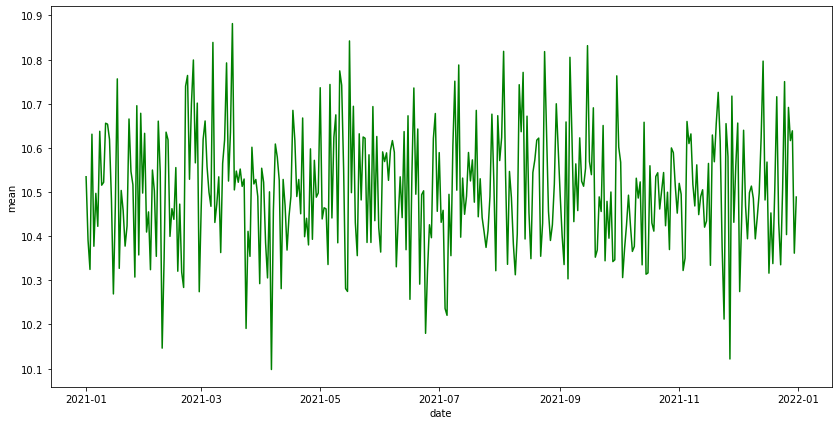

In [25]:
fig, ax = plt.subplots(figsize=(14, 7))
sns.lineplot(data=dates_data, x='date', y='mean', color='green', ax=ax)

<AxesSubplot:xlabel='date', ylabel='sessions'>

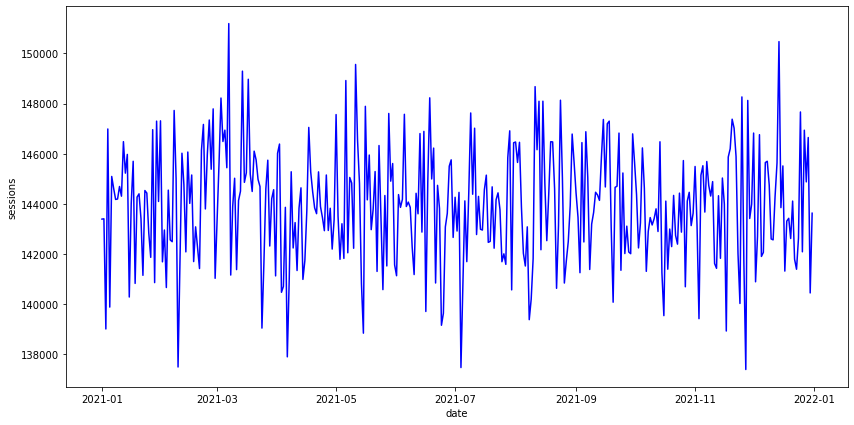

In [26]:
fig, ax = plt.subplots(figsize=(14, 7))
sns.lineplot(data=dates_data, x='date', y='sessions', color='blue', ax=ax)

In [27]:
dates_data = metric_date_agg(data, 'tts')

In [28]:
dates_data.sort_values(by='tts', ascending=False).head()

,date,count,mean,std,min,25%,50%,75%,max,tts
106,2021-04-17,13762.0,3280.498474,6397.296944,2.0,129.0,820.0,3457.75,78144.0,45146220
155,2021-06-05,14019.0,3214.271417,6364.268237,2.0,132.0,796.0,3387.00,88731.0,45060871
130,2021-05-11,13881.0,3238.418486,6194.803612,2.0,134.0,812.0,3541.00,94370.0,44952487
347,2021-12-14,13937.0,3222.541365,6332.716493,2.0,128.0,795.0,3403.00,90821.0,44912559
57,2021-02-27,13810.0,3232.346343,6532.391538,2.0,130.0,784.5,3365.25,130404.0,44638703


<AxesSubplot:xlabel='date', ylabel='mean'>

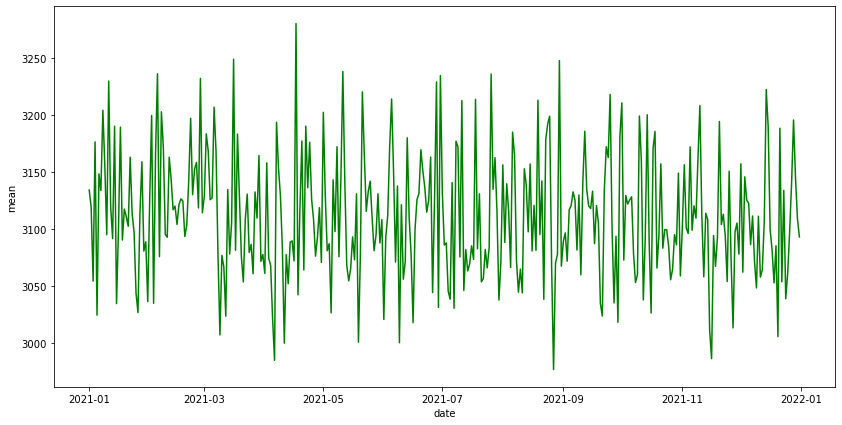

In [29]:
fig, ax = plt.subplots(figsize=(14, 7))
sns.lineplot(data=dates_data, x='date', y='mean', color='green', ax=ax)

<AxesSubplot:xlabel='date', ylabel='tts'>

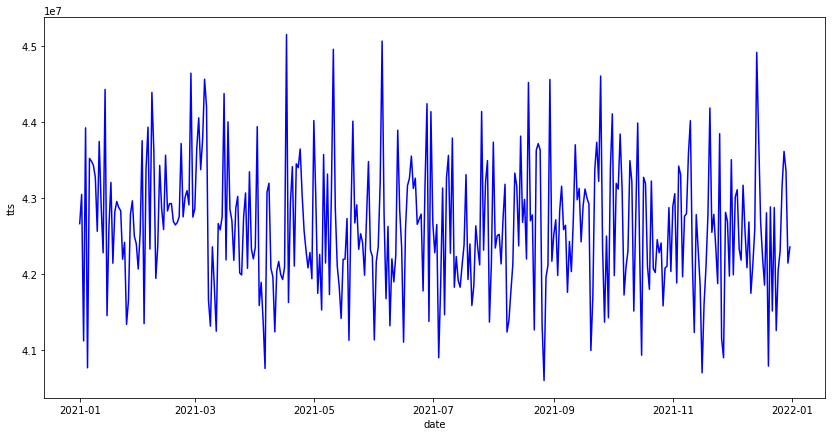

In [30]:
fig, ax = plt.subplots(figsize=(14, 7))
sns.lineplot(data=dates_data, x='date', y='tts', color='blue', ax=ax)

In [31]:
dates_data = metric_date_agg(data, 'tps')

In [32]:
dates_data.sort_values(by='mean', ascending=False).head()

,date,count,mean,std,min,25%,50%,75%,max,tps
254,2021-09-12,13716.0,428.719464,1749.745033,2.0,45.0000,134.235,362.2175,79086.0,5880316.17
241,2021-08-30,13718.0,420.351836,1644.604786,2.0,44.9625,134.000,372.5000,84899.0,5766386.49
235,2021-08-24,13693.0,416.940375,1509.534730,2.0,43.5000,132.000,367.0000,82742.0,5709164.55
289,2021-10-17,13647.0,416.052033,1614.054163,2.0,44.1100,131.710,359.8800,86396.0,5677862.09
111,2021-04-22,13618.0,415.405808,1515.736593,2.0,44.9475,135.000,360.3250,66318.0,5656996.30


<AxesSubplot:xlabel='date', ylabel='mean'>

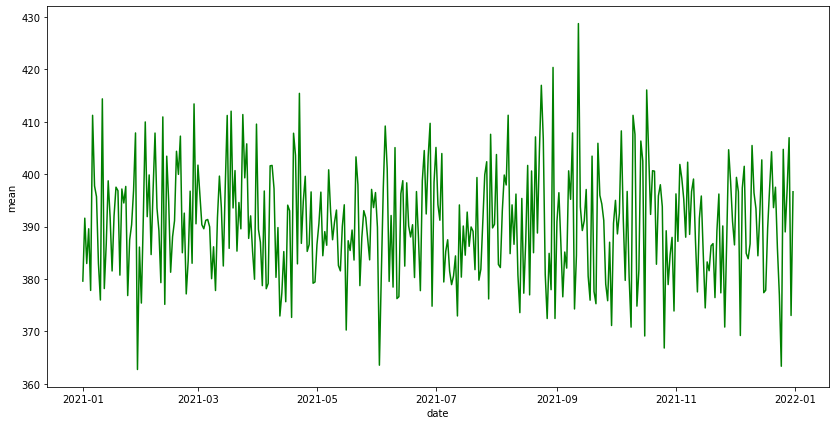

In [33]:
fig, ax = plt.subplots(figsize=(14, 7))
sns.lineplot(data=dates_data, x='date', y='mean', color='green', ax=ax)

<AxesSubplot:xlabel='date', ylabel='tps'>

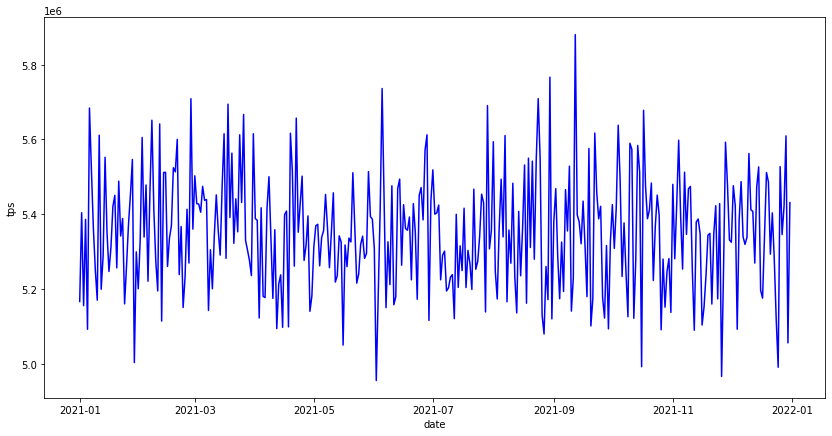

In [34]:
fig, ax = plt.subplots(figsize=(14, 7))
sns.lineplot(data=dates_data, x='date', y='tps', color='blue', ax=ax)

## Per Day Metrics

In [35]:
def day_metric_agg(data, column):
    agg_metrics = data.groupby(['day', 'day_name'])[f'{column}'].describe().reset_index()

    temp = data.groupby(['day', 'day_name'])[f'{column}'].sum().reset_index()

    agg_metrics = pd.merge(agg_metrics, temp, 
                           how='left', left_on=['day', 'day_name'], 
                           right_on=['day', 'day_name'], copy=False)

    return agg_metrics

In [36]:
day_data = day_metric_agg(data, 'sessions')
day_data.sort_values(by='day_name')


,day,day_name,count,mean,std,min,25%,50%,75%,max,sessions
0,0,Monday,711722.0,10.496419,16.618939,1.0,2.0,4.0,12.0,474.0,7470532
1,1,Tuesday,712452.0,10.519912,16.730837,1.0,2.0,4.0,12.0,608.0,7494932
2,2,Wednesday,711683.0,10.489378,16.563553,1.0,2.0,4.0,12.0,551.0,7465112
3,3,Thursday,712901.0,10.509500,16.654617,1.0,2.0,4.0,12.0,475.0,7492233
4,4,Friday,725572.0,10.500877,16.633315,1.0,2.0,4.0,12.0,445.0,7619142
5,5,Saturday,713088.0,10.507375,16.648375,1.0,2.0,4.0,12.0,457.0,7492683
6,6,Sunday,712582.0,10.525721,16.732302,1.0,2.0,4.0,12.0,690.0,7500439


<AxesSubplot:xlabel='day_name', ylabel='mean'>

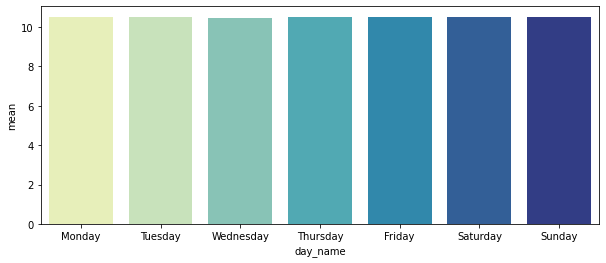

In [37]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.barplot(data=day_data, x='day_name', y='mean', palette='YlGnBu', ax=ax)

<AxesSubplot:xlabel='day_name', ylabel='sessions'>

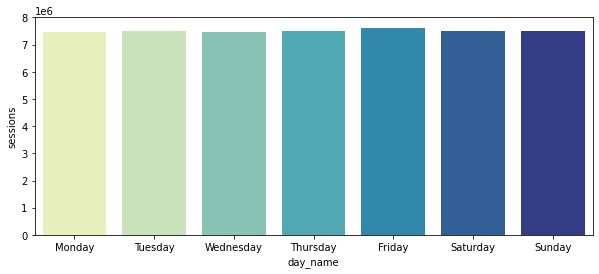

In [38]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.barplot(data=day_data, x='day_name', y='sessions', palette='YlGnBu', ax=ax)

In [39]:
day_data = day_metric_agg(data, 'tts')
day_data.sort_values(by='day_name')

,day,day_name,count,mean,std,min,25%,50%,75%,max,tts
0,0,Monday,711722.0,3112.691888,6140.276506,2.0,126.0,780.0,3325.00,156231.0,2215371296
1,1,Tuesday,712452.0,3109.315530,6116.780077,2.0,127.0,778.0,3325.00,167392.0,2215238068
2,2,Wednesday,711683.0,3099.581082,6089.187536,2.0,126.0,777.0,3321.00,154694.0,2205919163
3,3,Thursday,712901.0,3120.744512,6167.366382,2.0,127.0,781.0,3320.00,130404.0,2224781883
4,4,Friday,725572.0,3107.995599,6113.630179,2.0,127.0,780.0,3334.00,141910.0,2255074583
5,5,Saturday,713088.0,3116.236284,6124.093212,2.0,126.0,777.0,3330.00,130404.0,2222150699
6,6,Sunday,712582.0,3112.514939,6116.466891,2.0,127.0,783.0,3334.75,150877.0,2217922120


<AxesSubplot:xlabel='day_name', ylabel='mean'>

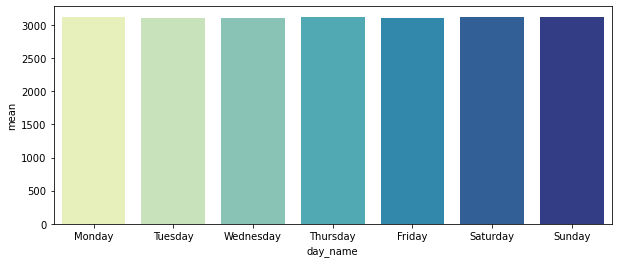

In [40]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.barplot(data=day_data, x='day_name', y='mean', palette='YlGnBu', ax=ax)

<AxesSubplot:xlabel='day_name', ylabel='tts'>

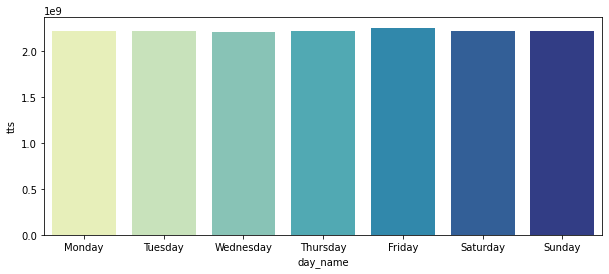

In [41]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.barplot(data=day_data, x='day_name', y='tts', palette='YlGnBu', ax=ax)

In [42]:
day_data = day_metric_agg(data, 'tps')
day_data.sort_values(by='day_name')


,day,day_name,count,mean,std,min,25%,50%,75%,max,tps
0,0,Monday,711722.0,392.404879,1239.794762,2.0,43.91,131.640,359.4000,85998.0,2.792832e+08
1,1,Tuesday,712452.0,388.876588,1209.535858,2.0,44.00,131.750,359.8800,86318.0,2.770559e+08
2,2,Wednesday,711683.0,389.887552,1218.854118,2.0,44.00,131.330,358.9100,86318.0,2.774763e+08
3,3,Thursday,712901.0,393.822681,1266.044169,2.0,44.00,131.500,360.8600,84961.0,2.807566e+08
4,4,Friday,725572.0,388.033570,1190.593031,2.0,44.00,132.290,361.0000,85296.0,2.815463e+08
5,5,Saturday,713088.0,389.731370,1212.282324,2.0,44.00,131.800,359.6725,86318.0,2.779128e+08
6,6,Sunday,712582.0,391.336173,1251.766042,2.0,44.00,131.655,360.0000,86396.0,2.788591e+08


<AxesSubplot:xlabel='day_name', ylabel='mean'>

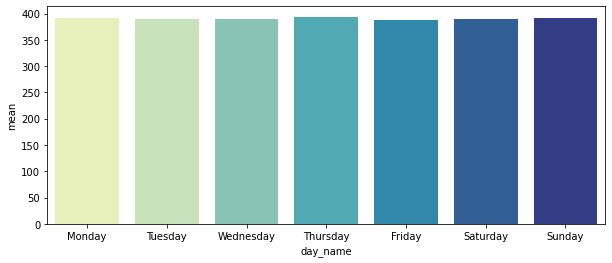

In [43]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.barplot(data=day_data, x='day_name', y='mean', palette='YlGnBu', ax=ax)

<AxesSubplot:xlabel='day_name', ylabel='tps'>

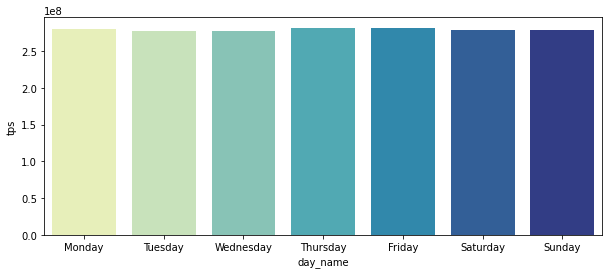

In [44]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.barplot(data=day_data, x='day_name', y='tps', palette='YlGnBu', ax=ax)

## Per Device Metrics

In [45]:
data.groupby('device_id').sessions.mean().sort_values(ascending=False).reset_index().head()

,device_id,sessions
0,k24mm8jd2ippYjrdHWodhJmbnEZ3De,37.172414
1,cTeSYWZhSH1ljz4zTnVEHZwKrr13ti,34.833333
2,ryy7bij68UQ1eunak8BiSVbMTvNDsP,34.391304
3,5RT6z3MBluH7yHH9Raqt6f5FkD1oDo,33.909091
4,TooBWfSMlhJb3lqJRfc36mLGkCx2NP,33.520000


In [46]:
data.groupby('device_id').sessions.sum().sort_values(ascending=False).reset_index().head()

,device_id,sessions
0,p0m5KCDvBfLonJYHTMzmVIH1SHWDsu,1182
1,5RT6z3MBluH7yHH9Raqt6f5FkD1oDo,1119
2,k24mm8jd2ippYjrdHWodhJmbnEZ3De,1078
3,KX8EMDiZsf4aElGtThoKdKEuvIQ8Qc,1073
4,AgIE2zULDN2l8XAsOO2zQw8rniaExr,1060


In [47]:
data.groupby('device_id').tts.mean().sort_values(ascending=False).reset_index().head()

,device_id,tts
0,XdphqStDt1uW7p00KqAUnKdgYVDKHy,11892.772727
1,N767zqZv9NXOXUPOOkMTxX3qWScONf,11234.483871
2,Q8Nv9sOgoVWlSmYi0K7uwp8IO8ql63,10697.107143
3,Fsw5tZ5BEMdCRJP7INtieoxzO1hNEy,10143.206897
4,CdKEyyUyVbdAgGQCd8SrwmRI6TmC9v,10030.750000


In [48]:
data.groupby('device_id').tts.sum().sort_values(ascending=False).reset_index().head()

,device_id,tts
0,5ipwMiwImj5KAdQNbfSmuSIAMFZmNY,358380
1,i2JOoJqGKKiBRYxWJvoul2e1oe1OEs,358225
2,cGQD4Lfs1w7AKxJf2eRtdBo12ZGT88,350358
3,SaavgzDPNvxS4JTLRXo9gSk74SGbII,348849
4,N767zqZv9NXOXUPOOkMTxX3qWScONf,348269


In [49]:
data.groupby('device_id').tps.mean().sort_values(ascending=False).reset_index().head()

,device_id,tps
0,YuwlotsxU7o9pN1G0cox1fQF3HYUQd,3792.655417
1,lxHEpZ5ote5JgeBVfDKqFzgWulaKfm,3752.571600
2,AozudyyQ9wKffRweKUyoTGxCouDPxf,3747.880500
3,wD788aDzzlQVpWcwumFl7lnwqjJVnf,3519.264138
4,hdPuEE2rF7mG9LKmAFhiJd1oO7xN1A,3472.192581


In [50]:
data.groupby('device_id').tps.sum().sort_values(ascending=False).reset_index().head()

,device_id,tps
0,JrZLtR2XWCI3024w4DlseEwFO6OGJL,119777.66
1,IfPVrUlapoQqerdH3KTnDauJWt4XG2,110827.94
2,YUs8546rSjoVgOdVwpbigAQ0XBHPwA,108481.33
3,tEIcVPoEdH8VgyJ1t8QrTpX8852s10,108400.24
4,hdPuEE2rF7mG9LKmAFhiJd1oO7xN1A,107637.97


## Per App Metrics

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
data.groupby('app_name').sessions.describe().sort_values(by = 'mean', ascending=False).head()

,count,mean,std,min,25%,50%,75%,max
app_name,,,,,,,,
whatsapp,624753.0,10.525096,16.707616,1.0,2.0,4.0,12.0,551.0
facebook,625697.0,10.512320,16.660141,1.0,2.0,4.0,12.0,457.0
tiktok,624903.0,10.510174,16.664822,1.0,2.0,4.0,12.0,442.0
twitter,625738.0,10.507348,16.638223,1.0,2.0,4.0,12.0,474.0
youtube,625663.0,10.500969,16.675954,1.0,2.0,4.0,12.0,690.0


In [53]:
temp = data.groupby('app_name').sessions.sum().reset_index().sort_values(by = 'sessions', ascending=True)

<AxesSubplot:xlabel='app_name', ylabel='sessions'>

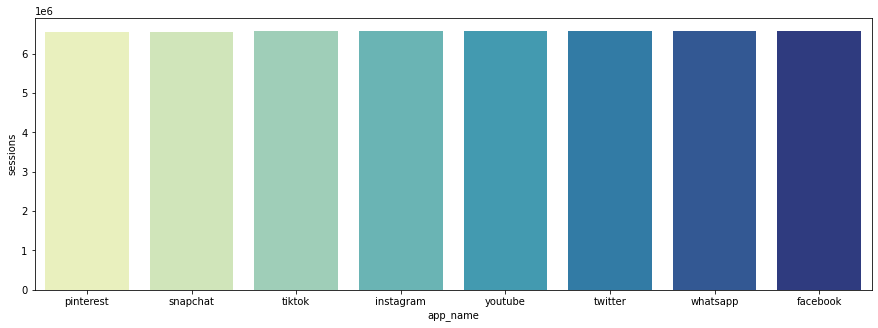

In [54]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(data=temp, x="app_name", y="sessions", palette='YlGnBu')

In [55]:
data.groupby('app_name').tts.describe().sort_values(by = 'mean', ascending=False).head()

,count,mean,std,min,25%,50%,75%,max
app_name,,,,,,,,
facebook,625697.0,3126.134890,6142.118499,2.0,127.0,783.0,3347.0,167392.0
whatsapp,624753.0,3112.072233,6134.521858,2.0,127.0,781.0,3328.0,130404.0
instagram,625680.0,3112.007336,6132.173111,2.0,126.0,776.0,3320.0,154694.0
twitter,625738.0,3109.963883,6129.769977,2.0,127.0,784.0,3335.0,150877.0
snapchat,624167.0,3109.581537,6103.006375,2.0,127.0,781.0,3334.0,137752.0


In [56]:
temp = data.groupby('app_name').tts.sum().reset_index().sort_values(by = 'tts', ascending=True)

In [57]:
temp.tail()

,app_name,tts
4,tiktok,1943172657
6,whatsapp,1944276464
5,twitter,1946022580
1,instagram,1947120750
0,facebook,1956013222


<AxesSubplot:xlabel='app_name', ylabel='tts'>

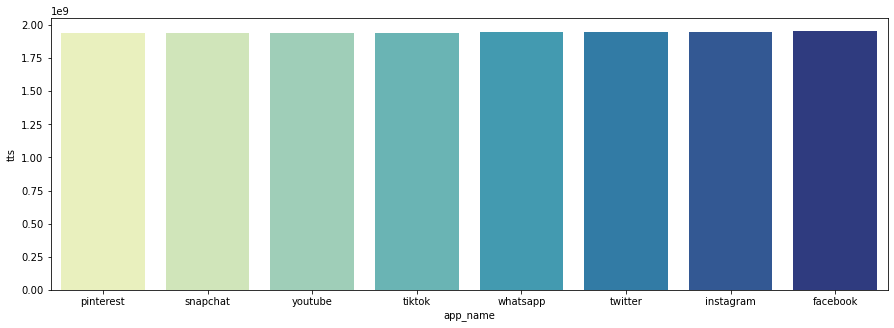

In [58]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(data=temp, x="app_name", y="tts", palette='YlGnBu')

In [59]:
temp= data.groupby('app_name').tps.describe().sort_values(by = 'mean', ascending=True).reset_index()

In [60]:
temp.tail()

,app_name,count,mean,std,min,25%,50%,75%,max
3,tiktok,624903.0,390.324966,1213.522735,2.0,44.0,131.75,360.40,85511.0
4,whatsapp,624753.0,390.576827,1226.803859,2.0,44.0,132.00,359.79,85511.0
5,snapchat,624167.0,391.034332,1250.951449,2.0,44.0,132.00,360.00,86318.0
6,facebook,625697.0,391.164414,1220.260700,2.0,44.0,132.32,362.00,86162.0
7,instagram,625680.0,392.507836,1258.088106,2.0,44.0,131.20,358.40,86396.0


<AxesSubplot:xlabel='app_name', ylabel='mean'>

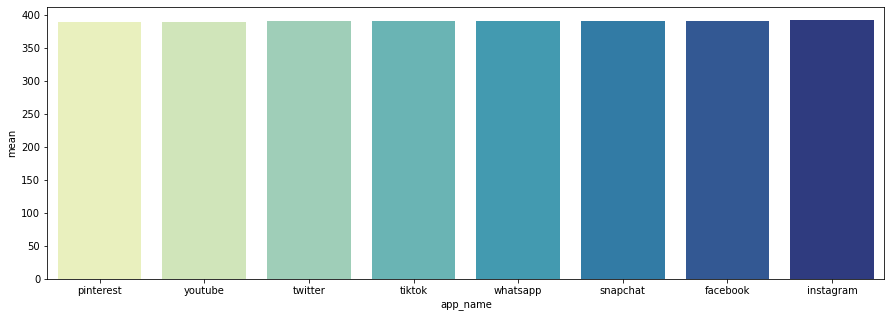

In [61]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(data=temp, x="app_name", y="mean", palette='YlGnBu')

## Per Android Metrics

In [62]:
data.groupby('android').sessions.describe().sort_values(by = 'mean', ascending=False).head()

,count,mean,std,min,25%,50%,75%,max
android,,,,,,,,
unknown,2502159.0,10.515142,16.668453,1.0,2.0,4.0,12.0,608.0
android,2497841.0,10.498873,16.640741,1.0,2.0,4.0,12.0,690.0


<AxesSubplot:xlabel='android', ylabel='sessions'>

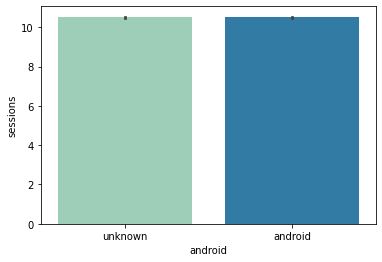

In [63]:
sns.barplot(data=data, x="android", y="sessions", palette='YlGnBu')

In [64]:
data.groupby('android').tts.describe().sort_values(by = 'mean', ascending=False).head()

,count,mean,std,min,25%,50%,75%,max
android,,,,,,,,
unknown,2502159.0,3114.725004,6132.328887,2.0,127.0,778.0,3329.0,167392.0
android,2497841.0,3107.852185,6115.628895,2.0,126.0,781.0,3325.0,156231.0


<AxesSubplot:xlabel='android', ylabel='tts'>

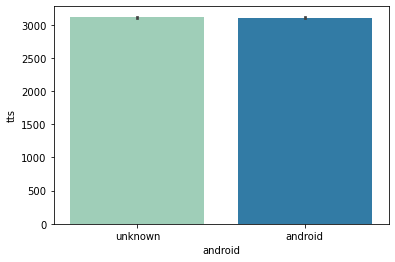

In [65]:
sns.barplot(data=data, x="android", y="tts", palette='YlGnBu')

In [66]:
data.groupby('android').tps.describe().sort_values(by = 'mean', ascending=False).head()

,count,mean,std,min,25%,50%,75%,max
android,,,,,,,,
android,2497841.0,390.803220,1227.788527,2.0,44.0,131.76,360.00,86318.0
unknown,2502159.0,390.353242,1226.481620,2.0,44.0,131.67,359.75,86396.0


<AxesSubplot:xlabel='android', ylabel='tps'>

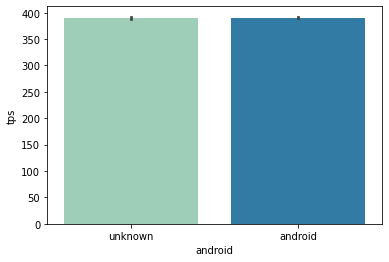

In [67]:
sns.barplot(data=data, x="android", y="tps", palette='YlGnBu')

## Correlations Between Variables

<ipython-input-68-0ea954e93f56>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap = 'YlGnBu')


Text(0.5, 1.0, 'Feature Correlation Matrix')

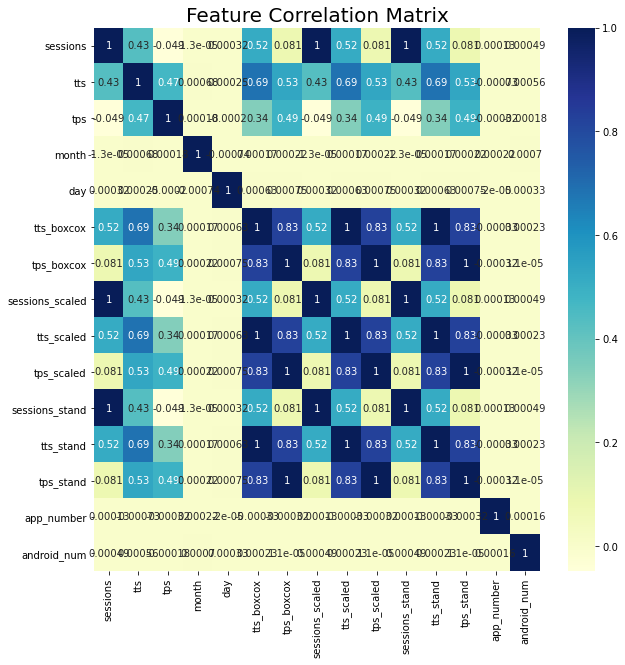

In [68]:
plt.figure(figsize = (10,10))
sns.heatmap(data.corr(), annot=True, cmap = 'YlGnBu')
plt.title("Feature Correlation Matrix", fontsize = 20)